In [86]:
from itertools import izip_longest, groupby
import pandas as pd
from statsmodels.discrete.discrete_model import MNLogit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [129]:
def mscatter(x,y,markers='u',c=None,label=[None],*args,**kwargs) :
    srt_f = lambda x: x[-1]
    xy = sorted(list(izip_longest(x,y,c,markers)), key=srt_f)
    xy_g = groupby(xy,srt_f)
    for m, xy_m in xy_g :
        x_m, y_m, c_m = zip(*[_[:-1] for _ in xy_m])
        #print x_m, y_m, c_m, m, l_
        l_ = label.get(m)
        scatter(x_m,y_m,marker=m,c=c_m,label=l_,*args,**kwargs)

In [7]:
cnts = pd.read_csv('all_mRNA_nonzero_norm_counts_trim.csv',index_col=0)

In [47]:
batch = pd.read_csv('/restricted/project/mlpd/sample_info/mRNA_sample_batch_map.csv',index_col=0)
batch = batch.loc[cnts.columns].Batch

print 'Controls:',sum([c.startswith('C') for c in batch.index])
print 'HD:',sum([c.startswith('H') for c in batch.index])
print 'PD:',sum([c.startswith('P') for c in batch.index])

Controls: 50
HD: 29
PD: 29


In [48]:
def fit(cnt) :
    fit = MNLogit(batch,cnt).fit(disp=False)
    return fit, min(fit.pvalues)

fits = cnts.ix[0:10].apply(fit,axis=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Batch   No. Observations:                  108
Model:                        MNLogit   Df Residuals:                      104
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 Mar 2015   Pseudo R-squ.:                     nan
Time:                        12:12:38   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -164.61
                                        LLR p-value:                       nan
===================================================================================
      Batch=HD3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ENSG00000228741    -0.1195      0.172     -0.694      0.488        -0.457     0.218
-----------------------------------------------------------------------------------
      Batch=PD1       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ENSG00000228741     0.1510      0.119      1.272      0.203        -0.082     0.384
-----------------------------------------------------------------------------------
      Batch=PD2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ENSG00000228741     0.1837      0.116      1.590      0.112        -0.043     0.410
-----------------------------------------------------------------------------------
      Batch=PD3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ENSG00000228741     0.2121      0.114      1.867      0.062        -0.011     0.435
===================================================================================
"""

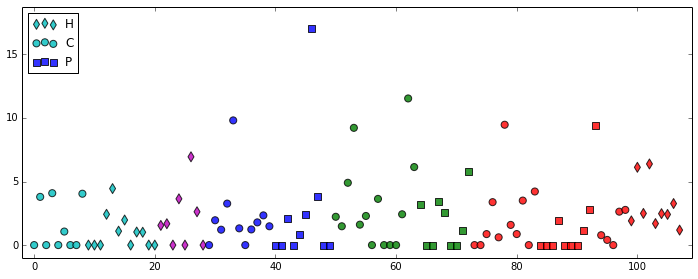

In [137]:
gene_idx = 4
fit = fits[gene_idx][0]

srt_batch = batch.sort(inplace=False)

gene_cnts = cnts.ix[gene_idx]
gene_cnts = gene_cnts[srt_batch.index]

sym_d = dict(zip('CPH','osd'))
sym_d.update(_[::-1] for _ in sym_d.items())
sym = [sym_d[c[0]] for c in srt_batch.index]

batch_colors_d = dict(zip(batch.unique(),mpl.rcParams['axes.color_cycle'][0:len(batch.unique())]))
batch_colors = [batch_colors_d[b] for b in srt_batch]

figure(figsize=(12,4.5))
mscatter(arange(gene_cnts.size),gene_cnts,c=batch_colors,markers=sym,s=50,alpha=0.8,label=sym_d)
legend(loc='upper left')
axis([-2,gene_cnts.size+1,gene_cnts.min()*.75-1,gene_cnts.max()*1.1])
fit.summary()

In [63]:
deseq_batch = pd.read_table('all_mRNA_nonzero_raw_counts_trim_DESeq2_batch.txt',index_col=0,sep=' ')

In [64]:
deseq_batch[deseq_batch.padj<0.05]

symbol      baseMean       HD.mean  Control.mean  \
ENSG00000228253       MT-ATP8  25758.271587  25038.204558  23252.579528   
ENSG00000263563         UBBP4     60.130086     55.228145     54.674691   
ENSG00000099977           DDT    528.920872    650.413283    507.237168   
ENSG00000242372          EIF6   1118.731791   1213.144617   1093.335994   
ENSG00000169840          GSX1      7.311264     14.800468      4.937564   
ENSG00000165283        STOML2   1371.242995   1463.929072   1335.689359   
ENSG00000184436         THAP7    840.949056    992.255889    782.013911   
ENSG00000149527         PLCH2   2187.892125   2132.071174   2411.307400   
ENSG00000174886       NDUFA11   1386.840308   1738.202119   1205.931445   
ENSG00000137880         GCHFR     67.803364     84.944350     58.289716   
ENSG00000101365         IDH3B   2309.195085   2427.835853   2310.805535   
ENSG00000174226         SNX31     21.745191     24.236178     16.215335   
ENSG00000174276        ZNHIT2    225.303122    269.794746    198.139943   
ENSG00000168216        LMBRD1   2395.073104   2452.113611   2478.141884   
ENSG00000178896        EXOSC4    340.684942    425.877422    307.119634   
ENSG00000116032        GRIN3B     19.599004     10.604467     22.420676   
ENSG00000178718         RPP25    392.889374    436.886388    382.737219   
ENSG00000111678      C12orf57   1454.234622   1839.928149   1264.896788   
ENSG00000101470         TNNC2     73.566341     93.127768     61.464221   
ENSG00000180769     WDFY3-AS2    512.620776    543.981479    504.525346   
ENSG00000241837         ATP5O   2494.853352   3070.124985   2303.332589   
ENSG00000107833          NPM3    225.419930    259.978885    222.220629   
ENSG00000102854          MSLN     39.679865     55.976760     27.970426   
ENSG00000163817       SLC6A20    139.854003    303.511450     61.952660   
ENSG00000175768         TOMM5    352.159596    396.085697    357.420887   
ENSG00000012223           LTF     39.341211     23.025548     33.181047   
ENSG00000126267        COX6B1   3761.949972   4149.308049   3588.585373   
ENSG00000171222        SCAND1   1226.649296   1506.485520   1062.924963   
ENSG00000213619        NDUFS3   2432.012829   2633.406592   2400.015046   
ENSG00000134548           SPX    711.055108    632.239228    713.985131   
...                       ...           ...           ...           ...   
ENSG00000042753         AP2S1   2110.312723   2414.104787   1955.763574   
ENSG00000178882       FAM101A    158.280454    222.878614    132.993853   
ENSG00000164880         INTS1   3842.440896   3401.363595   3883.861899   
ENSG00000152763         WDR78    104.949479    104.193156    107.129347   
ENSG00000170515         PA2G4   2265.589038   2452.582334   2265.584409   
ENSG00000100116          GCAT    725.618057    842.491041    638.333210   
ENSG00000002330           BAD   1617.659407   1911.047819   1465.908963   
ENSG00000127580         WDR24    472.004784    491.934050    439.699124   
ENSG00000272121  RP4-555D20.4     40.309654     49.523594     40.128561   
ENSG00000111087          GLI1    109.016012    146.363274     66.242013   
ENSG00000183647        ZNF530     96.434724    100.058319    105.866023   
ENSG00000241135     LINC00881      7.121697      9.638118      7.244940   
ENSG00000169750          RAC3    659.700687    741.001184    599.206853   
ENSG00000005448         WDR54    553.332380    608.868680    542.596106   
ENSG00000075702         WDR62     75.923981     70.267172     72.039132   
ENSG00000120262       CCDC170     37.246451     39.423904     36.444332   
ENSG00000159197         KCNE2     19.429991     23.528959     18.380367   
ENSG00000184271        POU6F1   2247.915946   2273.987380   2240.804322   
ENSG00000142546         NOSIP   1012.353409   1164.055481    880.004052   
ENSG00000099624         ATP5D   2885.288115   3380.730489   2513.654853   
ENSG00000164638       SLC29A4    971.839840   1128.637708    852.237190   
ENSG00000215041        NEURL4   1726.662780   15

Populating the interactive namespace from numpy and matplotlib


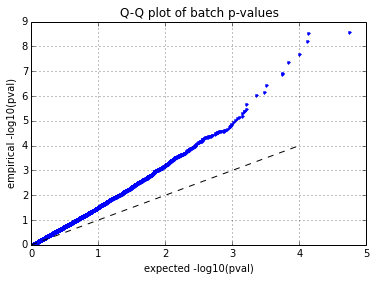

In [73]:
%pylab inline
plot(sorted(-log10(random.uniform(size=deseq_batch.shape[0]))),sorted(-log10(deseq_batch.pvalue)),'.')
plot([0,4],[0,4],'k--')
xlabel('expected -log10(pval)')
ylabel('empirical -log10(pval)')
grid()
title('Q-Q plot of batch p-values');

In [215]:
from IPython.display import display, HTML

html = """<link type="text/css" rel="stylesheet" href="https://flaviusmatis.github.io/simplePagination.js/simplePagination.css"/>
<script type="text/javascript" src="https://155.41.205.33:8888/nbextensions/simplePagination.js"></script>

<script type="text/javascript">
    $(".page").hide();
    $(".page").first().show();
    $("#outer").pagination({
        itemsOnPage: 1,
        items: 3,
        cssStyle: 'light-theme',
        onPageClick: function(pageNumber) { // this is where the magic happens
            // someone changed page, lets hide/show trs appropriately
            //var showFrom = perPage * (pageNumber - 1);
            var showTo = "#page"+pageNumber;
            $(".page").hide();
            $(showTo).show();
        }
    });
</script>

%s

<div id="outer"></div>"""
display(HTML(html%"stuffs"))
print fit.__repr__()

AttributeError: 'str' object has no attribute 'to_html'

In [221]:
meta = pd.read_csv('/project/bf591/admin/labadorf/project_4/metadata.csv')
meta = meta.loc[meta.sample_454_seqs!=-1]

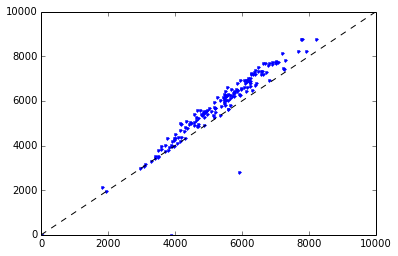

In [222]:
plot(meta.lib_reads_seqd,meta.sample_454_seqs,'.')
plot([0,10000],[0,10000],'k--')